In [123]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


df = pd.read_csv('Data/parks_dataset.csv')

df.head()

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [124]:
df_neighborhood = df.groupby('neighborhood').agg(
    total_parks=('name', 'count'))

df_neighborhood.reset_index(inplace=True)
df_neighborhood.sort_values('total_parks', ascending=False, inplace=True)
df_neighborhood

,neighborhood,total_parks
22,East Liberty,12
13,Central Business District,10
5,Beechview,8
50,Point Breeze,7
57,South Side Slopes,7
...,...,...
34,Homewood West,1
47,Oakwood,1
41,Middle Hill,1
45,North Oakland,1


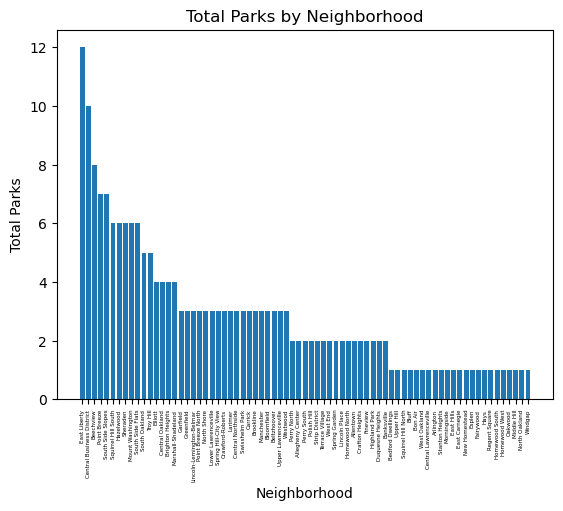

In [125]:
neighborhoods = df_neighborhood['neighborhood']
total_parks = df_neighborhood['total_parks'].values

plt.bar(neighborhoods, total_parks)
plt.title('Total Parks by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Parks')
plt.xticks(rotation=90, fontsize = 4)
plt.show()

                 neighborhood  2010_Total_Population
0                East Liberty                   5869
1   Central Business District                   3629
2                   Beechview                   7974
3                Point Breeze                   5315
4           South Side Slopes                   4423
..                        ...                    ...
68              Homewood West                    818
69                    Oakwood                   1027
70                Middle Hill                   1707
71              North Oakland                  10551
72                    Windgap                   1369

[73 rows x 2 columns]


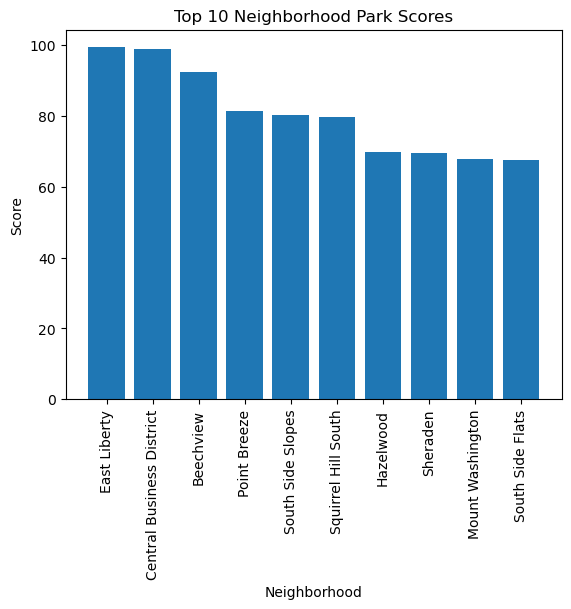

In [126]:
import re
#Cleainging the neighborhood names for merging
def clean_neighborhood_name(name):
    name = re.split(r'[-()]', name)[0]
    return name.strip()

#Reading Population dataset
df_population = pd.read_csv('Data/neighborhood_population.csv')

#Cleaning the neighborhood names in both datasets
df_population['Neighborhood'] = df_population['Neighborhood'].apply(clean_neighborhood_name)
df_neighborhood['neighborhood'] = df_neighborhood['neighborhood'].apply(clean_neighborhood_name)


#Joining two datasets on neighborhood
df_population.rename(columns={'Neighborhood': 'neighborhood'}, inplace=True)
df_neighborhood = df_neighborhood.merge(df_population, on='neighborhood', how='left')

print(df_neighborhood[['neighborhood','2010_Total_Population']])

#Calculating Population per park
df_neighborhood['pop_per_park'] = df_neighborhood['2010_Total_Population'] / df_neighborhood['total_parks'] 

#Normalizing the population per park score
mean = df_neighborhood['pop_per_park'].mean()
std = df_neighborhood['pop_per_park'].std()
df_neighborhood['z_score'] = (df_neighborhood['pop_per_park'] - mean) / std

df_neighborhood['normalized'] = 100 / (1 + np.exp(-df_neighborhood['z_score']))

#Sorting
df_neighborhood.sort_values('normalized', ascending=False, inplace=True)
df_neighborhood.head()

plt.bar(neighborhoods[:10], df_neighborhood['normalized'][:10])
plt.title('Top 10 Neighborhood Park Scores')
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

In [127]:
df_neighborhood.reset_index()[["neighborhood","normalized"]]

,neighborhood,normalized
0,Squirrel Hill North,99.267782
1,North Oakland,98.896517
2,Bluff,92.284794
3,Stanton Heights,81.195283
4,Central Lawrenceville,80.251570
...,...,...
68,Hays,33.226301
69,Strip District,32.618463
70,Esplen,32.540090
71,West End,30.624096
